# 10 interesting questions about an IMDB movies dataset answered by simple analysis.

### Author: Moamen Abdelrahman

In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load in the dataset
file_path = 'E:\\IEEE\\IMDB_movies.csv'
df = pd.read_csv(file_path)

In [3]:
# view few rows of the dataset
df.head()

,color,director_name,duration,actor_1_name,actor_2_name,genres,movie_title,num_voted_users,plot_keywords,movie_imdb_link,language,country,budget,release_date,imdb_score,movie_facebook_likes
0,Color,James Cameron,178.0,CCH Pounder,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,237000000.0,1/1/2009,7.9,33000
1,Color,Gore Verbinski,169.0,Johnny Depp,Orlando Bloom,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,471220,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,300000000.0,1/1/2007,12.0,0
2,Color,Sam Mendes,148.0,Christoph Waltz,Rory Kinnear,Action|Adventure|Thriller,Spectre,275868,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,245000000.0,1/1/2015,6.8,85000
3,Color,Christopher Nolan,164.0,Tom Hardy,Christian Bale,Action|Thriller,The Dark Knight Rises,1144337,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,250000000.0,1/1/2012,8.5,164000
4,NaN,Doug Walker,NaN,Doug Walker,Rob Walker,Documentary,Star Wars: Episode VII - The Force Awakens ...,8,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,1/1/2055,12.0,0


In [4]:
# have a look at the different columns and their dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5055 entries, 0 to 5054
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 5036 non-null   object 
 1   director_name         4951 non-null   object 
 2   duration              5040 non-null   float64
 3   actor_1_name          5048 non-null   object 
 4   actor_2_name          5042 non-null   object 
 5   genres                5055 non-null   object 
 6   movie_title           5055 non-null   object 
 7   num_voted_users       5055 non-null   int64  
 8   plot_keywords         4902 non-null   object 
 9   movie_imdb_link       5042 non-null   object 
 10  language              5043 non-null   object 
 11  country               5047 non-null   object 
 12  budget                4563 non-null   float64
 13  release_date          4951 non-null   object 
 14  imdb_score            5055 non-null   float64
 15  movie_facebook_likes 

#### all dtypes looks okay but the `release_date` column, we should convert it into `datetime`

In [5]:
# convert release_date column dtype to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors = 'ignore')

In [6]:
# check our changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5055 entries, 0 to 5054
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   color                 5036 non-null   object        
 1   director_name         4951 non-null   object        
 2   duration              5040 non-null   float64       
 3   actor_1_name          5048 non-null   object        
 4   actor_2_name          5042 non-null   object        
 5   genres                5055 non-null   object        
 6   movie_title           5055 non-null   object        
 7   num_voted_users       5055 non-null   int64         
 8   plot_keywords         4902 non-null   object        
 9   movie_imdb_link       5042 non-null   object        
 10  language              5043 non-null   object        
 11  country               5047 non-null   object        
 12  budget                4563 non-null   float64       
 13  release_date      

#### Check duplicated data

In [7]:
# count duplicated rows
df.duplicated().sum()

59

In [8]:
# drop all duplicated rows and fix the index
df.drop_duplicates(inplace=True, ignore_index=True)

In [9]:
# check our changes
df.duplicated().sum()

0

#### Check null values across columns

In [10]:
# count null values per column
df.isnull().sum()

color                    19
director_name           103
duration                 15
actor_1_name              7
actor_2_name             13
genres                    0
movie_title               0
num_voted_users           0
plot_keywords           152
movie_imdb_link          13
language                 12
country                   8
budget                  486
release_date            103
imdb_score                0
movie_facebook_likes      0
dtype: int64

In [11]:
# percentage of null values
pct = df.isnull().sum().sum()/df.shape[0] * 100
print(f'{pct: .2f}% of our data are null values!')

 18.63% of our data are null values!


#### about 20% of our data are null, it's a big percentage, so, we can't drop them all, but think to fill them

#### view distribution of `duration` column

In [12]:
df['duration'].describe()

count    4981.000000
mean      107.214214
std        25.253679
min         7.000000
25%        93.000000
50%       103.000000
75%       118.000000
max       511.000000
Name: duration, dtype: float64

#### mean is not far away from median, so, we can fill the null values with the mean duration

In [13]:
df['duration'].fillna(df['duration'].mean(), inplace=True)

#### view null values in `language` column

In [14]:
df.loc[df['language'].isnull()]

,color,director_name,duration,actor_1_name,actor_2_name,genres,movie_title,num_voted_users,plot_keywords,movie_imdb_link,language,country,budget,release_date,imdb_score,movie_facebook_likes
4,NaN,Doug Walker,107.214214,Doug Walker,Rob Walker,Documentary,Star Wars: Episode VII - The Force Awakens ...,8,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,2055-01-01,12.0,0
276,NaN,Christopher Barnard,22.000000,Mathew Buck,NaN,Comedy,"10,000 B.C.",6,NaN,http://www.imdb.com/title/tt1869849/?ref_=fn_t...,NaN,NaN,NaN,2055-01-01,7.2,0
2443,NaN,NaN,60.000000,Poppy Montgomery,Dylan Walsh,Drama|Mystery,Unforgettable,12854,hyperthymesia|new york city|police,http://www.imdb.com/title/tt1842530/?ref_=fn_t...,NaN,USA,NaN,NaT,6.7,0
3060,Color,Christopher Cain,111.000000,Jon Gries,Taylor Handley,Drama|History|Romance|Western,September Dawn,2618,massacre|mormon|settler|utah|wagon train,http://www.imdb.com/title/tt0473700/?ref_=fn_t...,NaN,USA,11000000.0,2007-01-01,5.8,411
3509,NaN,Richard Rich,45.000000,Debi Derryberry,Kate Higgins,Action|Adventure|Animation|Comedy|Drama|Family...,Alpha and Omega 4: The Legend of the Saw Tooth...,192,blindness|cave|spirit|wolf|wolf cub,http://www.imdb.com/title/tt4061848/?ref_=fn_t...,NaN,USA,7000000.0,2014-01-01,6.0,41
3838,Color,Mel Brooks,87.000000,Sid Caesar,Dom DeLuise,Comedy|Romance,Silent Movie,12666,black comedy|friend|modern silent movie|silent...,http://www.imdb.com/title/tt0075222/?ref_=fn_t...,NaN,USA,4400000.0,1976-01-01,6.7,629
4077,Color,Michael Landon Jr.,87.000000,William Morgan Sheppard,Kevin Gage,Drama|Family|Western,Love's Abiding Joy,1289,19th century|faith|mayor|ranch|sheriff,http://www.imdb.com/title/tt0785025/?ref_=fn_t...,NaN,USA,3000000.0,2006-01-01,7.2,76
4371,NaN,John Stockwell,90.000000,Matthew Ziff,T.J. Storm,Action,Kickboxer: Vengeance,246,NaN,http://www.imdb.com/title/tt3082898/?ref_=fn_t...,NaN,USA,17000000.0,2016-01-01,9.1,0
4590,NaN,Jonathan Meyers,111.000000,Justin Baldoni,Luke Perry,Drama,A Fine Step,207,NaN,http://www.imdb.com/title/tt1604100/?ref_=fn_t...,NaN,USA,1000000.0,2014-01-01,5.3,212
4768,Black and White,D.W. Griffith,123.000000,Lillian Gish,Mae Marsh,Drama|History|War,Intolerance: Love's Struggle Throughout the Ages,10718,huguenot|intolerance|medicis|protestant|wedding,http://www.imdb.com/title/tt0006864/?ref_=fn_t...,NaN,USA,385907.0,1916-01-01,8.0,691


#### we can fill null languages according to country, most of the nan's are from US, so, we fill those from US with 'English'

In [15]:
df.loc[(df['country'] == 'USA') & (df['language'].isnull()), 'language'] = 'USA'

#### Check our changes

In [16]:
df.isnull().sum()

color                    19
director_name           103
duration                  0
actor_1_name              7
actor_2_name             13
genres                    0
movie_title               0
num_voted_users           0
plot_keywords           152
movie_imdb_link          13
language                  2
country                   8
budget                  486
release_date            103
imdb_score                0
movie_facebook_likes      0
dtype: int64

#### Check for non-reasonable data

In [17]:
# view 'imdb_score' distribution
df['imdb_score'].describe()

count    4996.000000
mean        6.446617
std         1.140157
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max        16.000000
Name: imdb_score, dtype: float64

#### it contains scores above 10, that's not valid, so, we drop them

In [18]:
# select just scores less or equal to 10, and fix index
df = df[ df['imdb_score']<=10 ]
df.reset_index(inplace=True, drop=True)
df.head()

,color,director_name,duration,actor_1_name,actor_2_name,genres,movie_title,num_voted_users,plot_keywords,movie_imdb_link,language,country,budget,release_date,imdb_score,movie_facebook_likes
0,Color,James Cameron,178.0,CCH Pounder,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,237000000.0,2009-01-01,7.9,33000
1,Color,Sam Mendes,148.0,Christoph Waltz,Rory Kinnear,Action|Adventure|Thriller,Spectre,275868,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,245000000.0,2015-01-01,6.8,85000
2,Color,Christopher Nolan,164.0,Tom Hardy,Christian Bale,Action|Thriller,The Dark Knight Rises,1144337,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,250000000.0,2012-01-01,8.5,164000
3,Color,Andrew Stanton,132.0,Daryl Sabara,Samantha Morton,Action|Adventure|Sci-Fi,John Carter,212204,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,English,USA,263700000.0,2012-01-01,6.6,24000
4,Color,Nathan Greno,100.0,Brad Garrett,Donna Murphy,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Tangled,294810,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,English,USA,260000000.0,2010-01-01,7.8,29000


In [19]:
# check our changes
df['imdb_score'].describe()

count    4992.000000
mean        6.441366
std         1.124344
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

# Q1: What are the directors that have the lowest and highest mean budget-to-score ratio?

In [20]:
# ensure that all director names are clear from mis-typing
df['director_name'] = df['director_name'].str.strip().str.title()

In [21]:
# create new column by dividing budget over score, and set it in ($K/point)
df['budget_to_score'] = ( df['budget']/df['imdb_score'] ) / 1e+03

# view its distribution
df['budget_to_score'].describe()

count    4.507000e+03
mean     6.174934e+03
std      2.932010e+04
min      3.027778e-02
25%      9.427126e+02
50%      3.061224e+03
75%      7.142857e+03
max      1.745071e+06
Name: budget_to_score, dtype: float64

In [22]:
# get the average 'budget_to_score' per director, and sort them descendingly
data = df.groupby('director_name')['budget_to_score'].mean().dropna()
data.sort_values(inplace=True, ascending=False)
data

director_name
Joon-Ho Bong         875335.714286
Lajos Koltai         352112.676056
Katsuhiro Ôtomo      222069.343119
Chan-Wook Park       182525.464731
Takao Okawara        166666.666667
                         ...      
Neill Dela Llana          1.111111
Shane Carruth             1.000000
Anthony Vallone           0.416667
Benjamin Roberds          0.222222
Jonathan Caouette         0.030278
Name: budget_to_score, Length: 2174, dtype: float64

In [23]:
# just pick the lowest 3 and highest 3 directors
data_high = data.iloc[:3]
data_low = data.iloc[-3:]

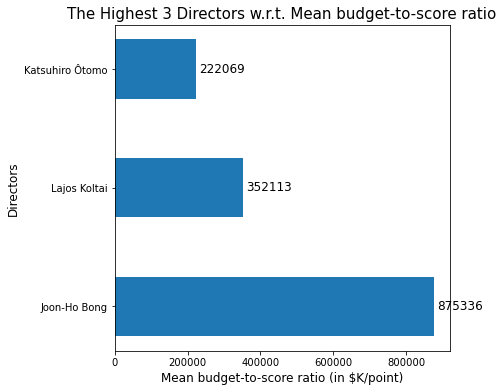

In [24]:
# plot the highest 3 directors
plt.figure(figsize=(6,6))
plt.barh(data_high.index, data_high.values, height=0.5)
plt.ylabel('Directors', fontdict={'fontsize':12})
plt.xlabel('Mean budget-to-score ratio (in $K/point)', fontdict={'fontsize':12})
plt.title('The Highest 3 Directors w.r.t. Mean budget-to-score ratio', fontdict={'fontsize':15})

# add value of each bar next to it
for i,v in enumerate(data_high):
    plt.text(v+1e+4,i-0.025, str(round(v)), fontdict={'fontsize':12})

plt.show()

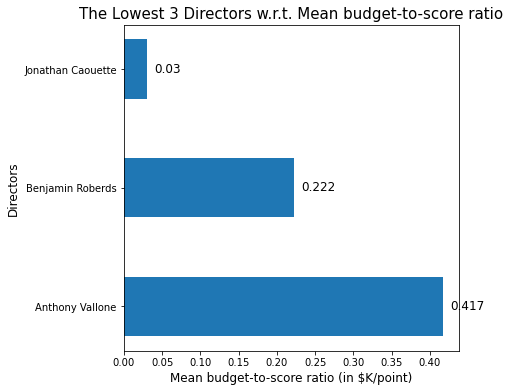

In [25]:
# plot the lowest 3 directors
plt.figure(figsize=(6,6))
plt.barh(data_low.index, data_low.values, height=0.5)
plt.ylabel('Directors', fontdict={'fontsize':12})
plt.xlabel('Mean budget-to-score ratio (in $K/point)', fontdict={'fontsize':12})
plt.title('The Lowest 3 Directors w.r.t. Mean budget-to-score ratio', fontdict={'fontsize':15})

# add value of each bar next to it
for i,v in enumerate(data_low):
    plt.text(v+0.01,i-0.025, str(round(v,3)), fontdict={'fontsize':12})

plt.show()

# Q2: Do people give higher scores to movies with longer or shorter duration?

In [26]:
# get a slice of our data, cleared from null values on the 'duration' column
data = df.dropna(subset=['duration']).reset_index(drop=True)
data.head(3)

,color,director_name,duration,actor_1_name,actor_2_name,genres,movie_title,num_voted_users,plot_keywords,movie_imdb_link,language,country,budget,release_date,imdb_score,movie_facebook_likes,budget_to_score
0,Color,James Cameron,178.0,CCH Pounder,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,Avatar,886204,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,237000000.0,2009-01-01,7.9,33000,30000.000000
1,Color,Sam Mendes,148.0,Christoph Waltz,Rory Kinnear,Action|Adventure|Thriller,Spectre,275868,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,245000000.0,2015-01-01,6.8,85000,36029.411765
2,Color,Christopher Nolan,164.0,Tom Hardy,Christian Bale,Action|Thriller,The Dark Knight Rises,1144337,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,250000000.0,2012-01-01,8.5,164000,29411.764706


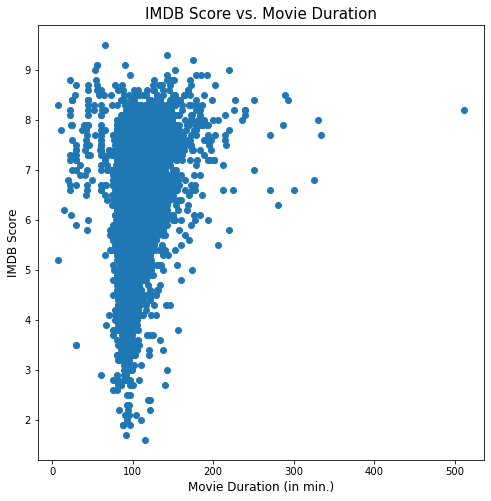

In [27]:
# plot a scatter between the two variable to explore the relation
plt.figure(figsize=(8,8))
plt.scatter(data['duration'], data['imdb_score'])


plt.ylabel('IMDB Score', fontdict={'fontsize':12})
plt.xlabel('Movie Duration (in min.)', fontdict={'fontsize':12})
plt.title('IMDB Score vs. Movie Duration', fontdict={'fontsize':15})

plt.show()

#### there is no significant relation between them, but also scores are getting less variate and tend to be high as duration increases, so, let's take a look at different visual

In [28]:
# create 20-minute-intervals start and end to plot a bar chart
ranges = np.arange(0, 521, 20)
means = []

# get each interval mean 'imdb_score'
for i,v in enumerate(ranges[:-1]):
    condition = (data['duration'] >= v) & (data['duration'] < ranges[i+1])
    means.append( data.loc[condition]['imdb_score'].mean() )

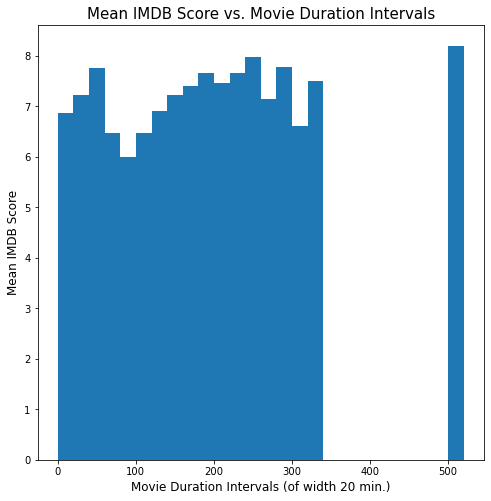

In [29]:
# plot what we got
plt.figure(figsize=(8,8))
plt.bar(ranges[1:], means, width=-20, align='edge')

plt.ylabel('Mean IMDB Score', fontdict={'fontsize':12})
plt.xlabel('Movie Duration Intervals (of width 20 min.)', fontdict={'fontsize':12})
plt.title('Mean IMDB Score vs. Movie Duration Intervals', fontdict={'fontsize':15})

plt.show()

#### It also shows no significant variation of scores as duration decreases or increases

# Q3: Which year had the highest budget spent on movies and what are those movies?

In [30]:
# create new column containing year extracted from 'release_date' column
df['year'] = df['release_date'].dt.year

# view 'year' column distribution
df['year'].describe()

count    4889.000000
mean     2002.495602
std        12.543706
min      1916.000000
25%      1999.000000
50%      2005.000000
75%      2011.000000
max      2055.000000
Name: year, dtype: float64

#### it contains years in the future, it's not valid, so, we drop years after 2020

In [31]:
# select just years below 2020
df = df.loc[ df['year']<=2020 ].reset_index(drop=True)

# check our changes
df['year'].describe()

count    4886.000000
mean     2002.463365
std        12.479871
min      1916.000000
25%      1999.000000
50%      2005.000000
75%      2011.000000
max      2016.000000
Name: year, dtype: float64

In [32]:
# get a slice of our data free of null values on 'year' and 'budget' columns
data = df.dropna(subset=['year', 'budget']).reset_index(drop=True)

# convert 'year' dtype from float to int
data['year'] = data['year'].astype(int)

In [33]:
# check duplicated movie titles
data['movie_title'].duplicated().sum()

75

In [34]:
# we can not have different data for the same movie, so, we drop duplicates
data.drop_duplicates(subset='movie_title', inplace=True, ignore_index=True)

# check our changes
data['movie_title'].duplicated().sum()

0

In [35]:
# we create a Series of mean budget per each year, sorted descendingly
sorted_budgets = data.groupby('year')['budget'].mean().sort_values(ascending=False)

# set budgets to be in $M
sorted_budgets /= 1e+6

sorted_budgets

year
2005    68.968482
1997    59.947150
2016    53.169828
1988    50.230000
2004    46.894594
          ...    
1929     0.379000
1934     0.325000
1933     0.319500
1925     0.245000
1920     0.100000
Name: budget, Length: 91, dtype: float64

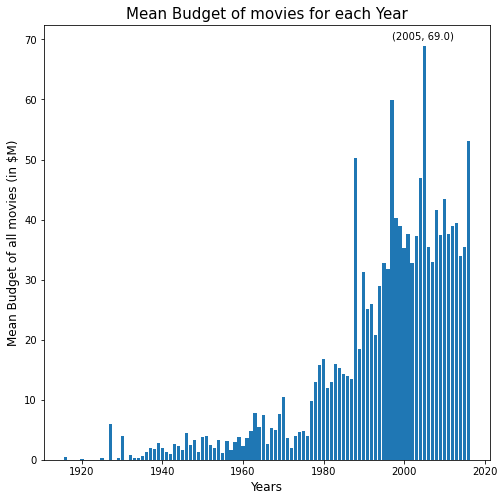

In [36]:
# plot what we got
plt.figure(figsize=(8,8))
plt.bar(sorted_budgets.index, sorted_budgets.values)

plt.ylabel('Mean Budget of all movies (in $M)', fontdict={'fontsize':12})
plt.xlabel('Years', fontdict={'fontsize':12})
plt.title('Mean Budget of movies for each Year', fontdict={'fontsize':15})

# add year and mean budget value above the highest bar for indication
x= sorted_budgets.index[0]
y=sorted_budgets.values[0]
plt.text(x-8, y+1, f'({x}, {round(y,1)})')

plt.show()

#### 2005 seems to be the year we search for, let's look at its movies

In [37]:
# get a slice of our data of only year 2005
bar_df = data.loc[ data['year']==2005 ].reset_index(drop=True)

In [38]:
# count number of movies in 2005
bar_df['movie_title'].nunique()

198

In [39]:
# they are many to plot, so, we get just their top 5
bar_df = bar_df.sort_values(by='budget', ascending=False, ignore_index=True).iloc[:5]
bar_df['movie_title'].nunique()

5

In [40]:
# set budget to be in $M
bar_df['budget'] /= 1e+6

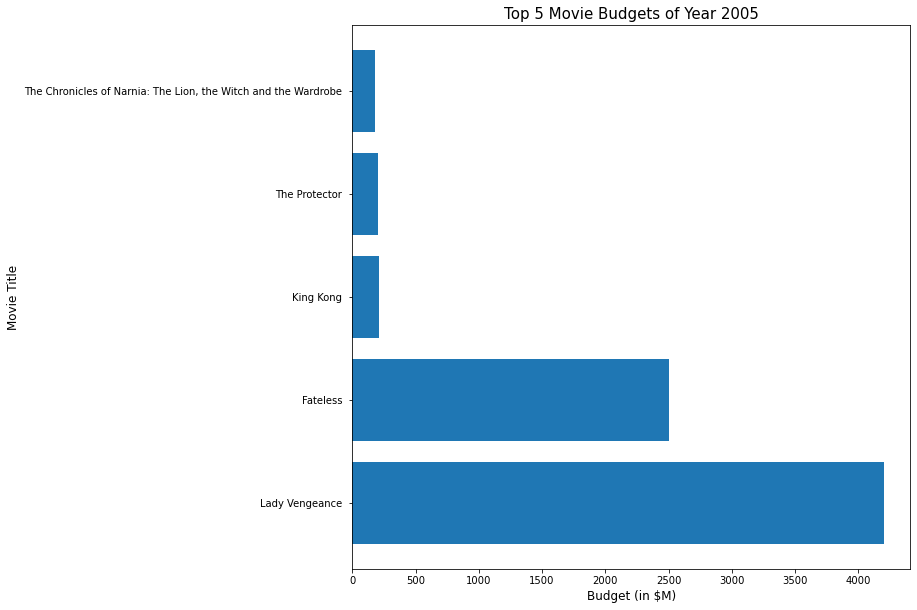

In [41]:
# plot what we got
plt.figure(figsize=(10,10))
plt.barh(bar_df['movie_title'], bar_df['budget'])

plt.ylabel('Movie Title', fontdict={'fontsize':12})
plt.xlabel('Budget (in $M)', fontdict={'fontsize':12})
plt.title('Top 5 Movie Budgets of Year 2005', fontdict={'fontsize':15})

plt.show()

# Q4: Which two actors worked together in movies most?

In [42]:
# ensure that actors names free from mis-typing
df['actor_1_name'] = df['actor_1_name'].str.strip().str.title()
df['actor_2_name'] = df['actor_2_name'].str.strip().str.title()

In [43]:
# get slice of our data free of null values on the two actors columns
data = df.dropna(subset=['actor_1_name', 'actor_2_name']).reset_index(drop=True)

In [44]:
# create a list to carry combined names of actor1 and actor2
combined = []

# combine them in alphabetical order
for i,j in zip(data['actor_1_name'],data['actor_2_name']):
    if i < j: combined.append(i+' - '+j)
    else: combined.append(j+' - '+i)

# create a new column of combined names
data['combined_actors'] = pd.Series(combined)

In [45]:
# get frequency of each unique combination of actors, sorted descindingly
data['combined_actors'].value_counts()

Adam Sandler - Steve Buscemi        6
Leonard Nimoy - Nichelle Nichols    4
Bruce Willis - Morgan Freeman       3
John Ratzenberger - Tom Hanks       3
Alan Rickman - Johnny Depp          3
                                   ..
Aldis Hodge - Neil Brown Jr.        1
Amrish Puri - Harrison Ford         1
Billy Burke - Morgan Freeman        1
Meryl Streep - Nina Arianda         1
Brian Herzlinger - John August      1
Name: combined_actors, Length: 4683, dtype: int64

In [46]:
# we just take the top 5 frequent combination
df_bar = data['combined_actors'].value_counts().iloc[:5]
df_bar

Adam Sandler - Steve Buscemi        6
Leonard Nimoy - Nichelle Nichols    4
Bruce Willis - Morgan Freeman       3
John Ratzenberger - Tom Hanks       3
Alan Rickman - Johnny Depp          3
Name: combined_actors, dtype: int64

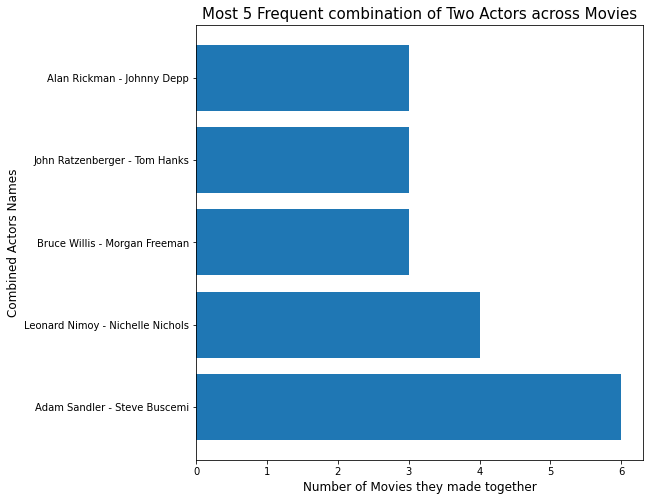

In [47]:
# plot what we got
plt.figure(figsize=(8,8))
plt.barh(df_bar.index, df_bar.values)

plt.ylabel('Combined Actors Names', fontdict={'fontsize':12})
plt.xlabel('Number of Movies they made together', fontdict={'fontsize':12})
plt.title('Most 5 Frequent combination of Two Actors across Movies', fontdict={'fontsize':15})

plt.show()

# Q5: Who are the top 5 actors Steven Spielberg favors most as main actors?

In [48]:
# get the data of only director 'Steven Spielberg' and free from null values on 'actor_1_name' column
data = df[ df['director_name'] == 'Steven Spielberg' ].dropna(subset=['actor_1_name']).reset_index(drop=True)

# count each director frequency with our director
data['actor_1_name'].value_counts()

Harrison Ford           4
Tom Hanks               3
Tom Cruise              2
Wayne Knight            1
Roy Scheider            1
Oprah Winfrey           1
Bob Balaban             1
Liam Neeson             1
Christopher Lee         1
Anthony Hopkins         1
Leonardo Dicaprio       1
Joseph Gordon-Levitt    1
Mark Rylance            1
Jeremy Irvine           1
Robin Williams          1
Ayelet Zurer            1
Ariana Richards         1
Haley Joel Osment       1
Toby Jones              1
Henry Thomas            1
Name: actor_1_name, dtype: int64

#### just 3 actors that are more frequent than others, we take just them

In [49]:
# get the top 3 actors
df_bar = data['actor_1_name'].value_counts().iloc[:3]
df_bar

Harrison Ford    4
Tom Hanks        3
Tom Cruise       2
Name: actor_1_name, dtype: int64

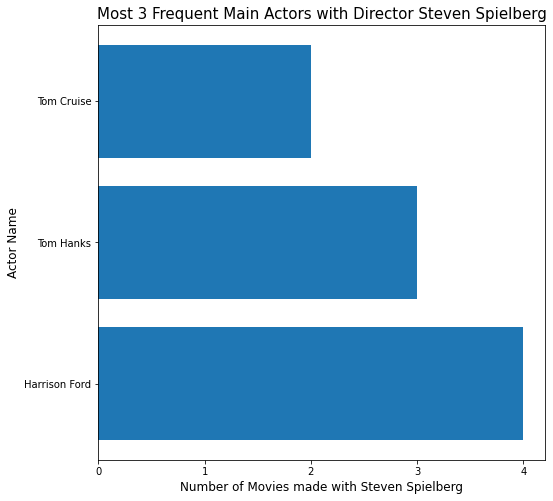

In [50]:
# plot what we got
plt.figure(figsize=(8,8))
plt.barh(df_bar.index, df_bar.values)

plt.ylabel('Actor Name', fontdict={'fontsize':12})
plt.xlabel('Number of Movies made with Steven Spielberg', fontdict={'fontsize':12})
plt.title('Most 3 Frequent Main Actors with Director Steven Spielberg', fontdict={'fontsize':15})
plt.xticks(range(0,5))

plt.show()

# Q6: Do movies with high budget usually have high scores?

In [51]:
# get slice of data free of null values on 'budget' and 'imdb_score' columns
data = df.dropna(subset=['budget', 'imdb_score']).reset_index(drop=True)

In [52]:
# set budget to be in $M
data['budget'] /= 1e+6

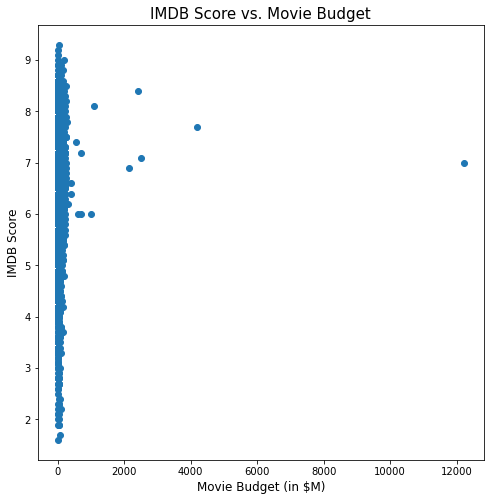

In [53]:
# plot what we got
plt.figure(figsize=(8,8))
plt.scatter(data['budget'], data['imdb_score'])

plt.ylabel('IMDB Score', fontdict={'fontsize':12})
plt.xlabel('Movie Budget (in $M)', fontdict={'fontsize':12})
plt.title('IMDB Score vs. Movie Budget', fontdict={'fontsize':15})

plt.show()

#### There is no strong correlation between the two variables, but the scores variation decreases and tends to be high as movie budget increases

# Q7: Which country has the highest average spending per movie?

In [54]:
# get slice of data free of nan's on 'country' and 'budget' columns
data = df.dropna(subset=['country', 'budget']).reset_index(drop=True)

# set budget to be in $M
data['budget'] /= 1e+6

In [55]:
# get mean movie budget per each country
data.groupby(by='country')['budget'].mean().sort_values(ascending=False)

country
South Korea             1383.960000
Hungary                 1260.000000
Japan                    350.595995
Thailand                 227.250000
India                     97.973355
                           ...     
Dominican Republic         0.500000
United Arab Emirates       0.125000
Afghanistan                0.046000
Kenya                      0.015000
Philippines                0.007000
Name: budget, Length: 62, dtype: float64

In [56]:
# they are many to plot, so, we just take the top 5
df_bar = data.groupby(by='country')['budget'].mean().sort_values(ascending=False).iloc[:5]

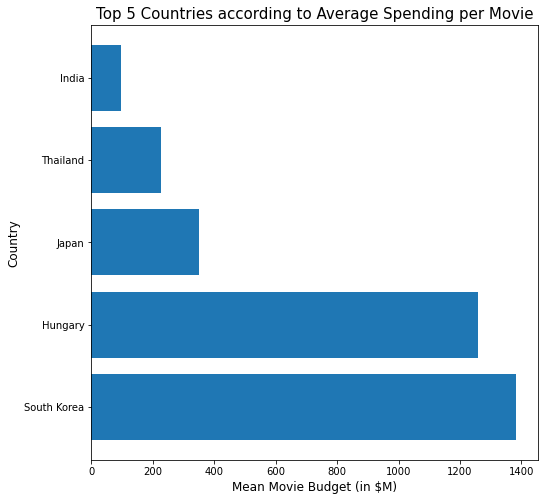

In [57]:
# plot what we got
plt.figure(figsize=(8,8))
plt.barh(df_bar.index, df_bar.values)

plt.ylabel('Country', fontdict={'fontsize':12})
plt.xlabel('Mean Movie Budget (in $M)', fontdict={'fontsize':12})
plt.title('Top 5 Countries according to Average Spending per Movie', fontdict={'fontsize':15})

plt.show()

# Q8: Do movies with more genres usually have higher score?

In [58]:
# get slice of data free of nan's on 'genres' column
data = df.dropna(subset=['genres']).reset_index(drop=True)

In [59]:
# count the genres into new column by counting the seperator '|'
data['number_of_genres'] = data['genres'].str.count('\|')+1

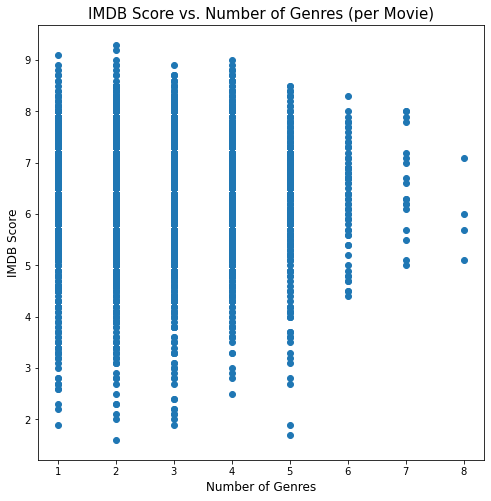

In [60]:
# plot what we got
plt.figure(figsize=(8,8))
plt.scatter(data['number_of_genres'], data['imdb_score'])

plt.ylabel('IMDB Score', fontdict={'fontsize':12})
plt.xlabel('Number of Genres', fontdict={'fontsize':12})
plt.title('IMDB Score vs. Number of Genres (per Movie)', fontdict={'fontsize':15})

plt.show()

#### There is no strong correlation between the two variables, but the scores variation decreases and tends to be high as number of movie genres increases

# Q9: Does higher duration of films tends to come with higher budget?

In [61]:
# get slice of data free of null values on 'duration' and 'budget' columns
data = df.dropna(subset=['duration', 'budget']).reset_index(drop=True)

# set budget to be in $M
data['budget'] /= 1e+6

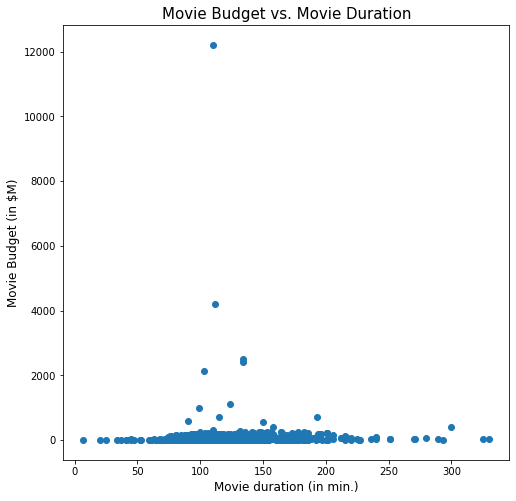

In [62]:
# plot what we got
plt.figure(figsize=(8,8))
plt.scatter(data['duration'], data['budget'])

plt.ylabel('Movie Budget (in $M)', fontdict={'fontsize':12})
plt.xlabel('Movie duration (in min.)', fontdict={'fontsize':12})
plt.title('Movie Budget vs. Movie Duration', fontdict={'fontsize':15})

plt.show()

#### It shows no relation between our two variables

# Q10: Which director and country made the most diversified movie languages?

In [63]:
# get slice of data free of nan's on 'director_name' and 'language' columns
data = df.dropna(subset=['director_name', 'language']).reset_index(drop=True)

In [64]:
# count the different movie languages per director
data.groupby('director_name')['language'].nunique().sort_values(ascending=False)

director_name
Kar-Wai Wong        3
Michael Haneke      3
Mel Gibson          3
Sergey Bodrov       3
Gabriele Muccino    2
                   ..
Gurinder Chadha     1
Gus Van Sant        1
Guy Hamilton        1
Guy Maddin          1
Étienne Faure       1
Name: language, Length: 2395, dtype: int64

In [65]:
# they are many to plot, so, we take just the top 5
df_bar = data.groupby('director_name')['language'].nunique().sort_values(ascending=False).iloc[:5]

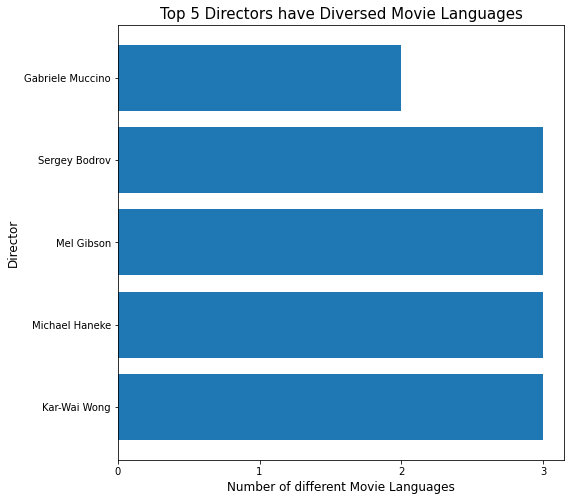

In [66]:
# plot what we got
plt.figure(figsize=(8,8))
plt.barh(df_bar.index, df_bar.values)

plt.ylabel('Director', fontdict={'fontsize':12})
plt.xlabel('Number of different Movie Languages', fontdict={'fontsize':12})
plt.title('Top 5 Directors have Diversed Movie Languages', fontdict={'fontsize':15})
plt.xticks(range(0,4))

plt.show()

In [67]:
# get slice of data free of nan's on 'country' and 'language' columns
data = df.dropna(subset=['country', 'language']).reset_index(drop=True)

In [68]:
# count the different movie languages per country
data.groupby('country')['language'].nunique().sort_values(ascending=False)

country
USA                   14
UK                     7
India                  5
Canada                 5
France                 5
                      ..
Nigeria                1
Dominican Republic     1
Official site          1
Pakistan               1
Afghanistan            1
Name: language, Length: 65, dtype: int64

In [69]:
# they are many to plot, so, we take just the top 5
df_bar = data.groupby('country')['language'].nunique().sort_values(ascending=False).iloc[:5]

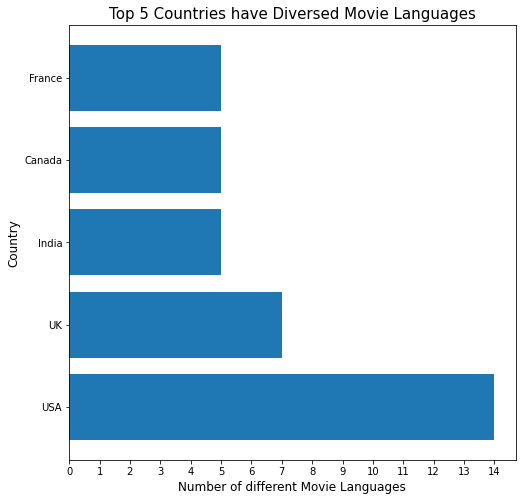

In [70]:
# plot what we got
plt.figure(figsize=(8,8))
plt.barh(df_bar.index, df_bar.values)

plt.ylabel('Country', fontdict={'fontsize':12})
plt.xlabel('Number of different Movie Languages', fontdict={'fontsize':12})
plt.title('Top 5 Countries have Diversed Movie Languages', fontdict={'fontsize':15})
plt.xticks(range(0,15))

plt.show()

### I hope you share me your feedback at: https://www.linkedin.com/in/moamen-abdelrahman05/

# Thanks for your interest!